<a href="https://colab.research.google.com/github/Sabry-Ahmed/CODE_Regression_lineaire_simple/blob/main/Logistics_Regression_for_Titanic__data_jeudiMatin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importer vos librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model #modèle linéaire
from sklearn.metrics import mean_squared_error, r2_score #métriques d'évaluation

In [4]:
df_gender_submission = pd.read_csv("/content/gender_submission.csv", sep=",")
df_test = pd.read_csv("/content/test.csv", sep=",")
df_train = pd.read_csv("/content/train.csv", sep=",")



print("Data loaded.")

Data loaded.


In [28]:
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [41]:
print(len(df_train))
print(len(df_test))



891
418


<Figure size 1000x600 with 0 Axes>

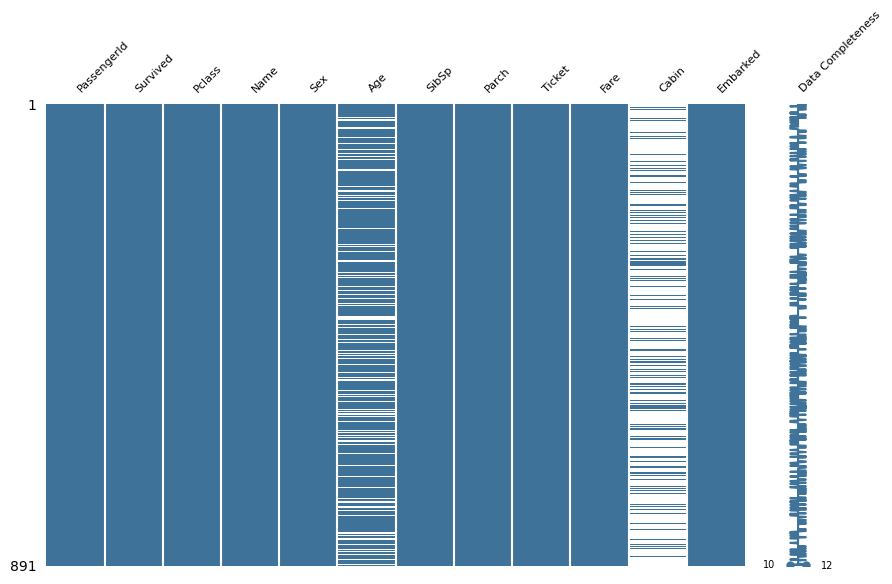

In [7]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt




plt.figure(figsize=(10, 6))
msno.matrix(df_train, figsize=(10,6), fontsize=8, labels=True, color=(0.25, 0.45, 0.6))
plt.show()


In [8]:
df_train["Age"].isnull().mean() * 100

19.865319865319865

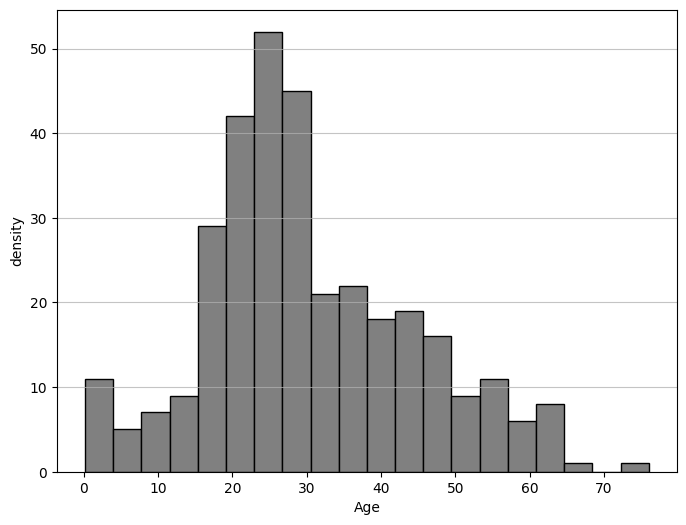

In [9]:

plt.figure(figsize=(8, 6))
plt.hist(df_test['Age'], bins=20, color='grey', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("density")
plt.grid(axis='y', alpha=0.75)
plt.show()

In [10]:
moyenne = df_train["Age"].median()
medianne = df_train["Age"].mean()

# Print the results
print(f"moyenne: {moyenne:.2f}")
print(f"medianne: {medianne:.2f}")

moyenne: 28.00
medianne: 29.70


In [11]:
df_train["Cabin"].isnull().mean() * 100

77.10437710437711

In [12]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

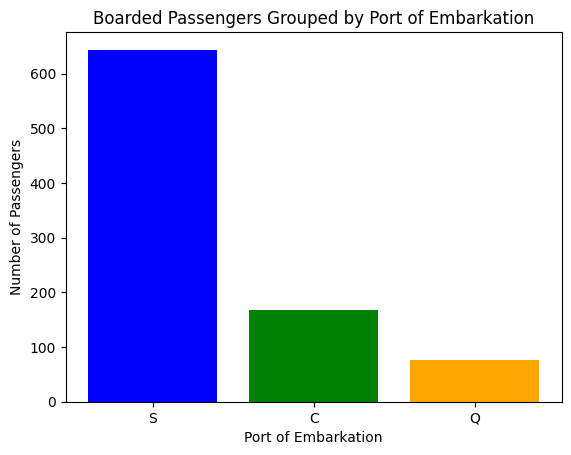

In [13]:
embarked_distribution = df_train["Embarked"].value_counts()


plt.bar(embarked_distribution.index, embarked_distribution.values, color=['blue', 'green', 'orange'])
plt.title("Boarded Passengers Grouped by Port of Embarkation")
plt.xlabel("Port of Embarkation")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.show()

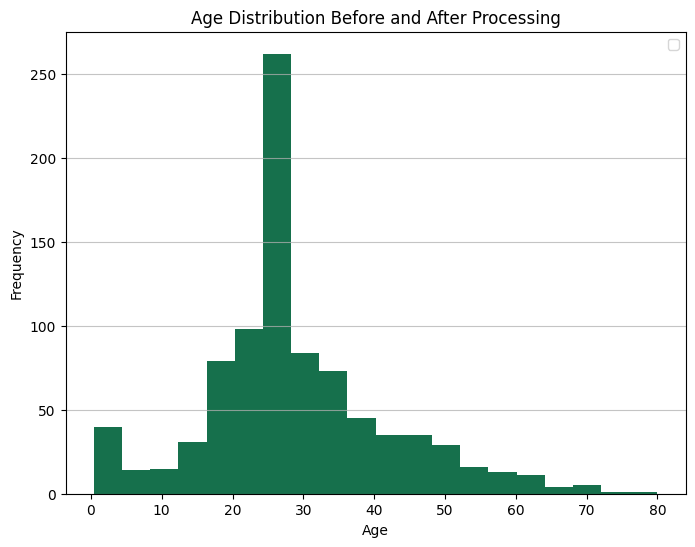

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(df_train['Age'], bins=20, color='blue', alpha=0.7)

df_train["Age"].fillna(28, inplace=True)

ax.hist(df_train['Age'], bins=20, color='green', alpha=0.7)

plt.title("Age Distribution Before and After Processing")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.legend()

plt.show()














In [17]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

most_common_embarked = df_train['Embarked'].value_counts().idxmax()
df_train['Embarked'].fillna(most_common_embarked, inplace=True)

missing_values = df_train.isnull().sum()

missing_values


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C


In [45]:
df_train['TravelAlone'] = (df_train['SibSp'] + df_train['Parch'] == 0).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [47]:
categorical_features = ['Pclass', 'Embarked', 'Sex']
titanic_encoded = pd.get_dummies(df_train, columns=categorical_features, drop_first=False)
titanic_encoded.head()


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1,0,0,1,0,1


In [48]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
titanic_filtered = titanic_encoded.drop(columns=columns_to_drop)


In [50]:
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
most_common_embarked_test = df_test['Embarked'].value_counts().idxmax()
df_test['Embarked'].fillna(most_common_embarked_test, inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
df_test['TravelAlone'] = (df_test['SibSp'] + df_test['Parch'] == 0).astype(int)
categorical_features = ['Pclass', 'Embarked', 'Sex']
titanic_encoded_test = pd.get_dummies(df_test, columns=categorical_features, drop_first=False)
columns_to_drop_test = ['PassengerId', 'Name', 'Ticket']
titanic_filtered_test = titanic_encoded_test.drop(columns=columns_to_drop_test)
missing_values_test = titanic_filtered_test.isnull().sum()

print("TEST DATA")
missing_values_test
titanic_filtered.head()

TEST DATA


,Survived,Age,SibSp,Parch,Fare,Cabin,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,NaN,0,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,C85,0,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,NaN,1,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,C123,0,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,NaN,1,0,0,1,0,0,1,0,1


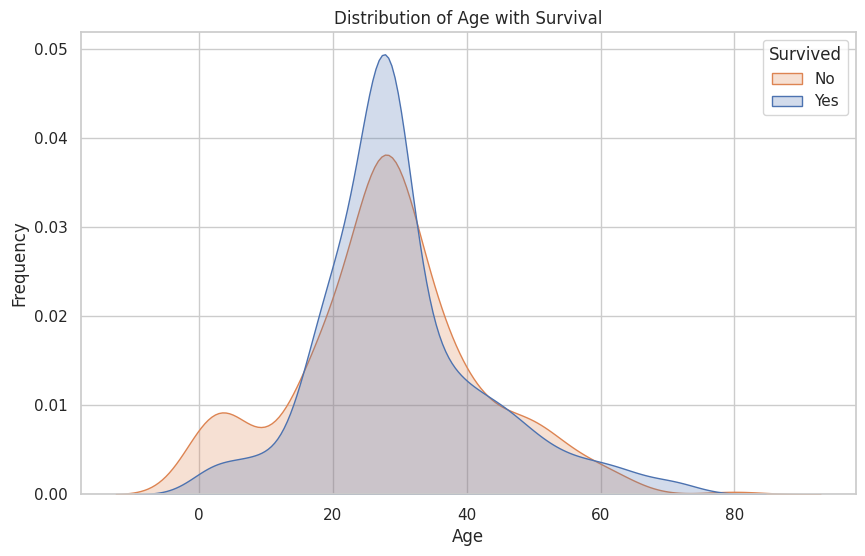

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic_filtered, x='Age', hue='Survived', fill=True, common_norm=False)
plt.title("Distribution of Age with Survival")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(title="Survived", labels=["No", "Yes"])

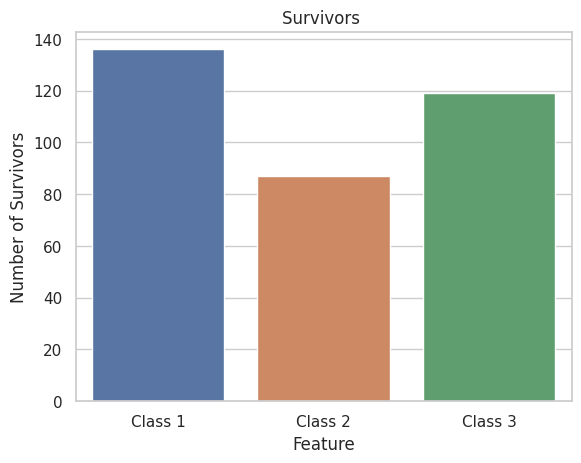

In [56]:
titanic_filtered['IsMinor'] = (titanic_filtered['Age'] < 16).astype(int)
titanic_filtered.head()
def plot_survivors(data, feature_columns, feature_labels, title, palette=None):
    survivors = [data[data[col] == 1]['Survived'].sum() for col in feature_columns]
    sns.barplot(x=feature_labels, y=survivors, palette=palette)
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Number of Survivors')

feature_columns_class = ['Pclass_1', 'Pclass_2', 'Pclass_3']
feature_labels_class = ['1', '2', '3']
plot_survivors(titanic_filtered, feature_columns_class, feature_labels_class,'Survivors ')





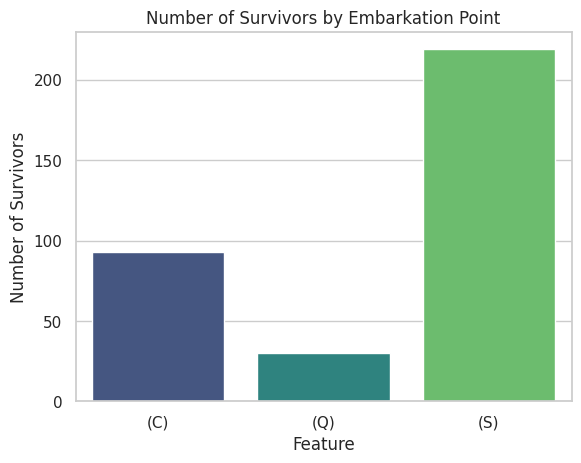

In [57]:
feature_columns_embarked = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
feature_labels_embarked = ['(C)', '(Q)', '(S)']
plot_survivors(titanic_filtered, feature_columns_embarked, feature_labels_embarked,
              'Number of Survivors by Embarkation Point', "viridis")

Text(0, 0.5, 'Number of Survivors')

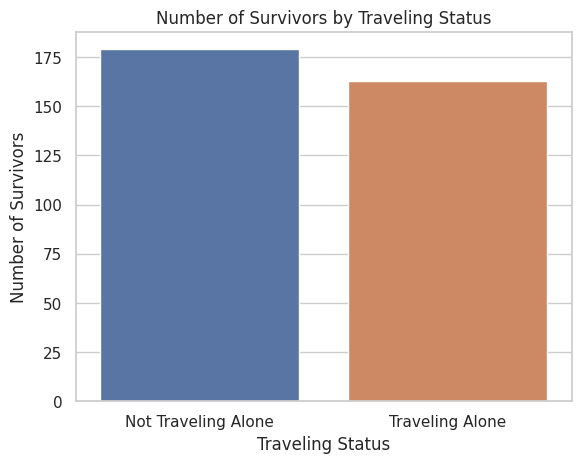

In [59]:
feature_labels_alone = ['Not Traveling Alone', 'Traveling Alone']
travel_alone_survivors = titanic_filtered['Survived'].sum() - titanic_filtered[titanic_filtered['TravelAlone'] == 0]['Survived'].sum()
not_travel_alone_survivors = titanic_filtered[titanic_filtered['TravelAlone'] == 0]['Survived'].sum()
sns.barplot(x=feature_labels_alone, y=[not_travel_alone_survivors, travel_alone_survivors])
plt.title('Number of Survivors by Traveling Status')
plt.xlabel('Traveling Status')
plt.ylabel('Number of Survivors')

Text(0, 0.5, 'Number of Survivors')

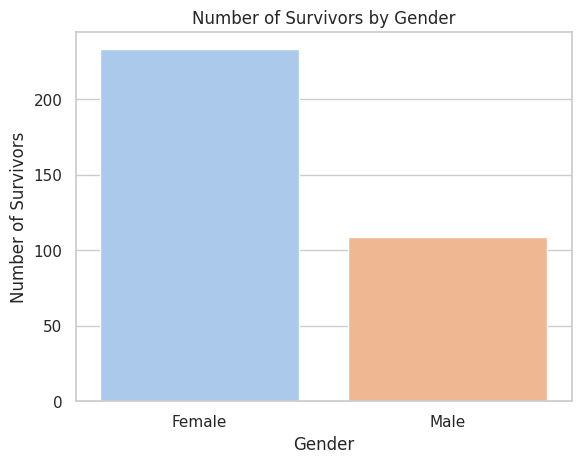

In [60]:
feature_labels_gender = ['Female', 'Male']
female_survivors = titanic_filtered[titanic_filtered['Sex_female'] == 1]['Survived'].sum()
male_survivors = titanic_filtered[titanic_filtered['Sex_male'] == 1]['Survived'].sum()
sns.barplot(x=feature_labels_gender, y=[female_survivors, male_survivors], palette="pastel")
plt.title('Number of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')

In [62]:
from sklearn.linear_model import LogisticRegression
X = titanic_filtered.drop(['Survived'], axis=1)
y = titanic_filtered["Survived"]
logisticreg = LogisticRegression(max_iter=1000)
X_4_features = titanic_filtered[['Pclass_1', 'Pclass_2', 'Sex_male', 'IsMinor']]
X_8_features = titanic_filtered[['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']]
logisticreg.fit(X_4_features, y)
y_pred_4 = logisticreg.predict(X_4_features)
logisticreg.fit(X_8_features, y)
y_pred_8 = logisticreg.predict(X_8_features)

In [66]:
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X_4_features, y, test_size=0.2, random_state=42)
X8_train, X8_test, y8_train, y8_test = train_test_split(X_8_features, y, test_size=0.2, random_state=42)

logisticreg.fit(X4_train, y4_train)
y4_pred = logisticreg.predict(X4_test)
y4_pred_proba = logisticreg.predict_proba(X4_test)[:, 1]

logisticreg.fit(X8_train, y8_train)
y8_pred = logisticreg.predict(X8_test)
y8_pred_proba = logisticreg.predict_proba(X8_test)[:, 1]




array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [69]:
from sklearn.metrics import accuracy_score, auc, log_loss, roc_auc_score, confusion_matrix, classification_report, roc_curve

fpr_4, tpr_4, thresholds_4 = roc_curve(y4_test, y4_pred_proba)
roc_auc_4 = auc(fpr_4, tpr_4)
